In [1]:
#Data Acquisition

import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import seaborn as sns

In [2]:
# Load the CSV file from the Resourced folder
df = pd.read_csv('Resources/ecommerce.csv')
df.head()

,REF_DATE,GEO,DGUID,Sales,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2016-01,Canada,2016A000011124,"Retail trade, unadjusted\n [44-453]",Dollars,81,thousands,3,v108795018,1.1,37415147,A,NaN,NaN,0
1,2016-01,Canada,2016A000011124,"Electronic shopping and mail-order houses, una...",Dollars,81,thousands,3,v108795019,1.2,679612,B,NaN,NaN,0
2,2016-01,Canada,2016A000011124,"Retail E-commerce sales, unadjusted\n",Dollars,81,thousands,3,v108795020,1.3,877354,A,NaN,NaN,0
3,2016-01,Canada,2016A000011124,"Retail E-commerce sales, seasonally adjusted\n",Dollars,81,thousands,3,v1257881695,1.4,977198,A,NaN,NaN,0
4,2016-02,Canada,2016A000011124,"Retail trade, unadjusted\n [44-453]",Dollars,81,thousands,3,v108795018,1.1,36815980,A,NaN,NaN,0


In [3]:
# Display basic information about the data
df.info()

# Display summary statistics
df.describe(include='all')

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   REF_DATE       336 non-null    object 
 1   GEO            336 non-null    object 
 2   DGUID          336 non-null    object 
 3   Sales          336 non-null    object 
 4   UOM            336 non-null    object 
 5   UOM_ID         336 non-null    int64  
 6   SCALAR_FACTOR  336 non-null    object 
 7   SCALAR_ID      336 non-null    int64  
 8   VECTOR         336 non-null    object 
 9   COORDINATE     336 non-null    float64
 10  VALUE          336 non-null    int64  
 11  STATUS         336 non-null    object 
 12  SYMBOL         0 non-null      float64
 13  TERMINATED     0 non-null      float64
 14  DECIMALS       336 non-null    int64  
dtypes: float64(3), int64(4), object(8)
memory usage: 39.5+ KB


REF_DATE           0
GEO                0
DGUID              0
Sales              0
UOM                0
UOM_ID             0
SCALAR_FACTOR      0
SCALAR_ID          0
VECTOR             0
COORDINATE         0
VALUE              0
STATUS             0
SYMBOL           336
TERMINATED       336
DECIMALS           0
dtype: int64

In [44]:
# Remove columns with 100% missing values
df = df.drop(columns=['SYMBOL', 'TERMINATED'])

# Convert REF_DATE to datetime
df['REF_DATE'] = pd.to_datetime(df['REF_DATE'])

# Remove columns with only one unique value
df = df.drop(columns=['GEO', 'DGUID', 'UOM', 'SCALAR_FACTOR', 'UOM_ID'])

# Handle duplicates
df = df.drop_duplicates()

# Clip outliers in the VALUE column
df['VALUE'] = df['VALUE'].clip(lower=df['VALUE'].quantile(0.01), upper=df['VALUE'].quantile(0.99))

# Display the cleaned data
df.head()

,REF_DATE,Sales,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,DECIMALS
0,2016-01-01,"Retail trade, unadjusted\n [44-453]",3,v108795018,1.1,37415147.0,A,0
1,2016-01-01,"Electronic shopping and mail-order houses, una...",3,v108795019,1.2,679612.0,B,0
2,2016-01-01,"Retail E-commerce sales, unadjusted\n",3,v108795020,1.3,877354.0,A,0
3,2016-01-01,"Retail E-commerce sales, seasonally adjusted\n",3,v1257881695,1.4,977198.0,A,0
4,2016-02-01,"Retail trade, unadjusted\n [44-453]",3,v108795018,1.1,36815980.0,A,0


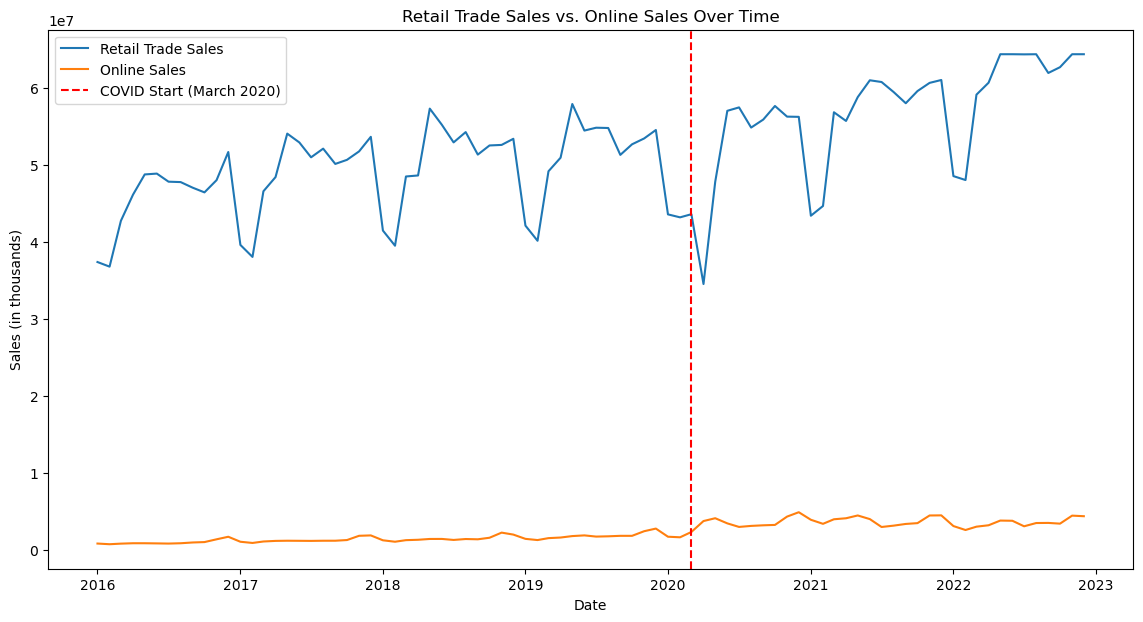

(-5.288056821151404,
 2.0194261432710503e-06,
 -18.255670755409394,
 2.6795980272813457e-25)

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Load the CSV file
file_path = 'Resources/ecommerce.csv'
df = pd.read_csv(file_path)

# Remove columns with 100% missing values
df = df.drop(columns=['SYMBOL', 'TERMINATED'])

# Convert REF_DATE to datetime
df['REF_DATE'] = pd.to_datetime(df['REF_DATE'])

# Remove columns with only one unique value
df = df.drop(columns=['GEO', 'DGUID', 'UOM', 'SCALAR_FACTOR', 'UOM_ID'])

# Handle duplicates
df = df.drop_duplicates()

# Clip outliers in the VALUE column
df['VALUE'] = df['VALUE'].clip(lower=df['VALUE'].quantile(0.01), upper=df['VALUE'].quantile(0.99))

# Define the COVID-19 impact period
covid_start = pd.to_datetime('2020-03-01')

# Split the data into pre-COVID and during-COVID periods
pre_covid = df[df['REF_DATE'] < covid_start]
during_covid = df[df['REF_DATE'] >= covid_start]

# Visualize the trends
plt.figure(figsize=(14, 7))

# Retail trade sales
retail_sales = df[df['Sales'].str.contains('Retail trade, unadjusted')]
plt.plot(retail_sales['REF_DATE'], retail_sales['VALUE'], label='Retail Trade Sales')

# Online sales
online_sales = df[df['Sales'].str.contains('Retail E-commerce sales, unadjusted')]
plt.plot(online_sales['REF_DATE'], online_sales['VALUE'], label='Online Sales')

plt.axvline(covid_start, color='red', linestyle='--', label='COVID Start (March 2020)')
plt.xlabel('Date')
plt.ylabel('Sales (in thousands)')
plt.title('Retail Trade Sales vs. Online Sales Over Time')
plt.legend()
plt.show()

# Statistical analysis
# Compare the means before and during COVID for retail sales
pre_covid_retail = pre_covid[pre_covid['Sales'].str.contains('Retail trade, unadjusted')]['VALUE']
during_covid_retail = during_covid[during_covid['Sales'].str.contains('Retail trade, unadjusted')]['VALUE']
t_stat_retail, p_val_retail = ttest_ind(pre_covid_retail, during_covid_retail, equal_var=False)

# Compare the means before and during COVID for online sales
pre_covid_online = pre_covid[pre_covid['Sales'].str.contains('Retail E-commerce sales, unadjusted')]['VALUE']
during_covid_online = during_covid[during_covid['Sales'].str.contains('Retail E-commerce sales, unadjusted')]['VALUE']
t_stat_online, p_val_online = ttest_ind(pre_covid_online, during_covid_online, equal_var=False)

t_stat_retail, p_val_retail, t_stat_online, p_val_online


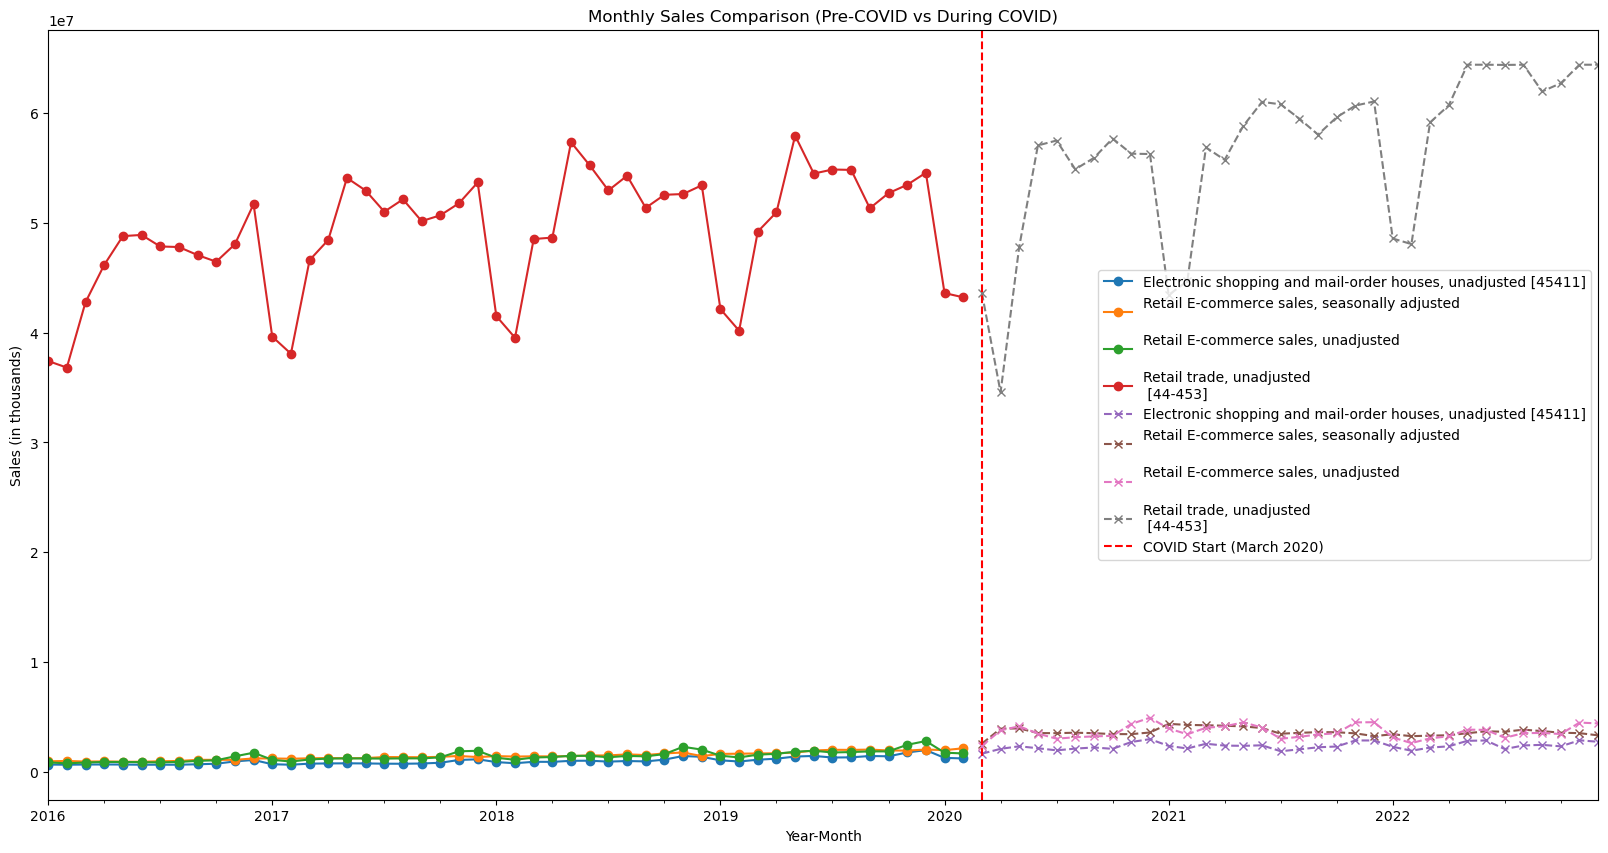

In [46]:
# Group data by month and year for comparison
df['YearMonth'] = df['REF_DATE'].dt.to_period('M')

# Aggregate sales by month
monthly_sales = df.groupby(['YearMonth', 'Sales'])['VALUE'].sum().unstack()

# Split the data into pre-COVID and during-COVID periods
pre_covid_monthly = monthly_sales[monthly_sales.index < '2020-03']
during_covid_monthly = monthly_sales[monthly_sales.index >= '2020-03']

# Plot monthly sales comparison
plt.figure(figsize=(20, 10))

# Pre-COVID
pre_covid_monthly.plot(ax=plt.gca(), linestyle='-', marker='o', title='Monthly Sales Comparison (Pre-COVID vs During COVID)')

# During-COVID
during_covid_monthly.plot(ax=plt.gca(), linestyle='--', marker='x')

plt.axvline(pd.to_datetime('2020-03'), color='red', linestyle='--', label='COVID Start (March 2020)')
plt.xlabel('Year-Month')
plt.ylabel('Sales (in thousands)')
plt.legend()
plt.show()


<Figure size 1400x700 with 0 Axes>

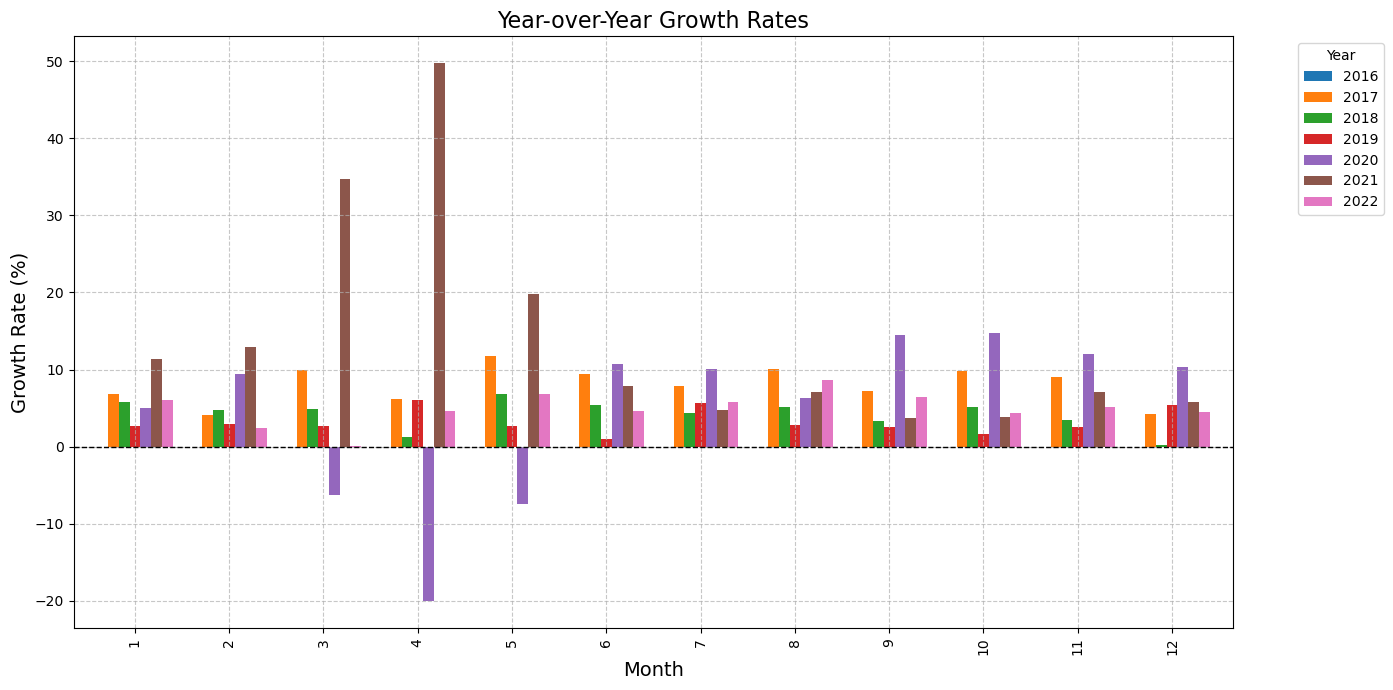

In [47]:
# Calculate year-over-year growth rates
df['Year'] = df['REF_DATE'].dt.year
df['Month'] = df['REF_DATE'].dt.month
yoy_growth = df.pivot_table(values='VALUE', index='Month', columns='Year', aggfunc='sum')

# Calculate percentage growth
yoy_growth = yoy_growth.pct_change(axis='columns') * 100

# Plot YoY growth rates
plt.figure(figsize=(14, 7))
ax = yoy_growth.plot(kind='bar', figsize=(14, 7), width=0.8)

# Add title and labels
ax.set_title('Year-over-Year Growth Rates', fontsize=16)
ax.set_xlabel('Month', fontsize=14)
ax.set_ylabel('Growth Rate (%)', fontsize=14)

# Add grid lines
ax.grid(True, linestyle='--', alpha=0.7)

# Highlight significant points (e.g., during COVID-19)
plt.axhline(0, color='black', linestyle='--', linewidth=1)

# Improve the legend
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()

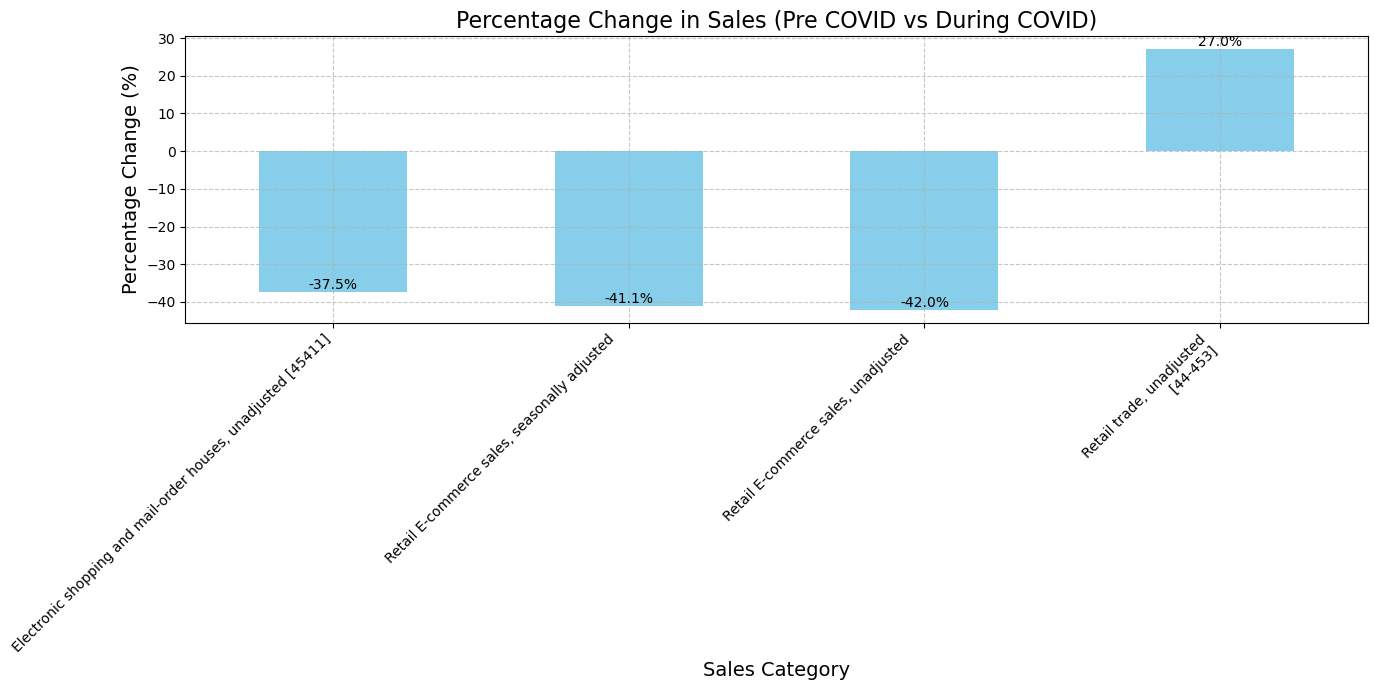

c:\Users\migo3\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\migo3\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


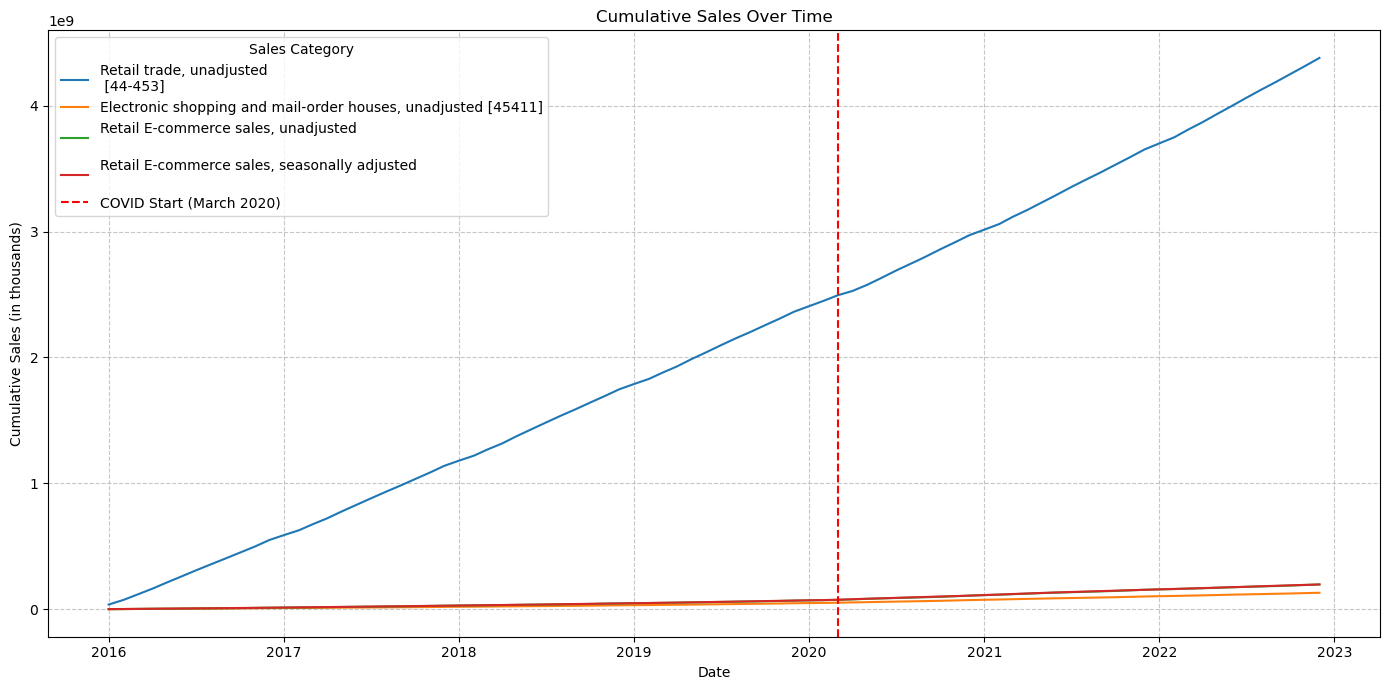

In [48]:
# Calculate percentage change in sales
df['Period'] = df['REF_DATE'].apply(lambda x: 'During COVID' if x >= pd.to_datetime('2020-03-01') else 'Pre COVID')
sales_change = df.groupby(['Sales', 'Period'])['VALUE'].sum().unstack().pct_change(axis='columns').iloc[:, 1] * 100

# Plot percentage change in sales
plt.figure(figsize=(14, 7))
ax1 = sales_change.plot(kind='bar', color='skyblue', legend=False)
ax1.set_title('Percentage Change in Sales (Pre COVID vs During COVID)', fontsize=16)
ax1.set_xlabel('Sales Category', fontsize=14)
ax1.set_ylabel('Percentage Change (%)', fontsize=14)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
ax1.grid(True, linestyle='--', alpha=0.7)
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.tight_layout()
plt.show()

# Calculate cumulative sales
df['Cumulative_Sales'] = df.groupby('Sales')['VALUE'].cumsum()

# Plot cumulative sales
plt.figure(figsize=(14, 7))
sns.lineplot(x='REF_DATE', y='Cumulative_Sales', hue='Sales', data=df)
plt.axvline(pd.to_datetime('2020-03'), color='red', linestyle='--', label='COVID Start (March 2020)')
plt.title('Cumulative Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Sales (in thousands)')
plt.legend(title='Sales Category')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

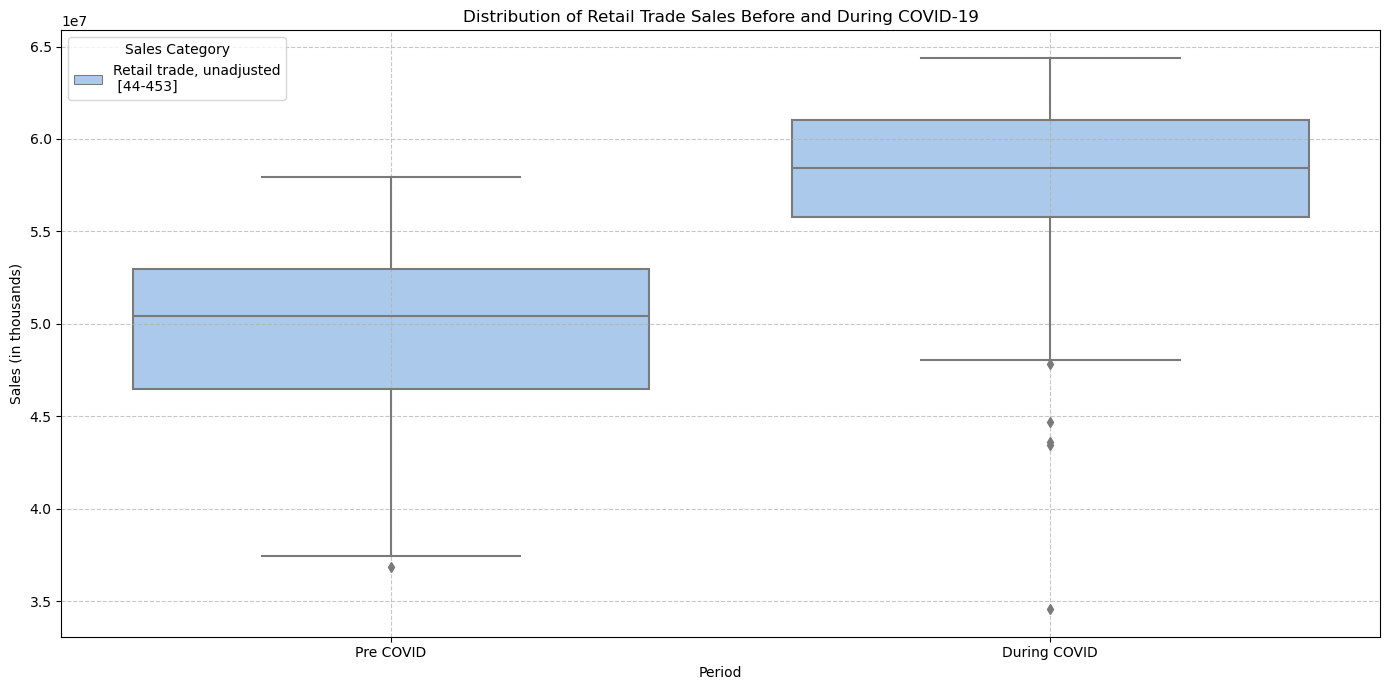

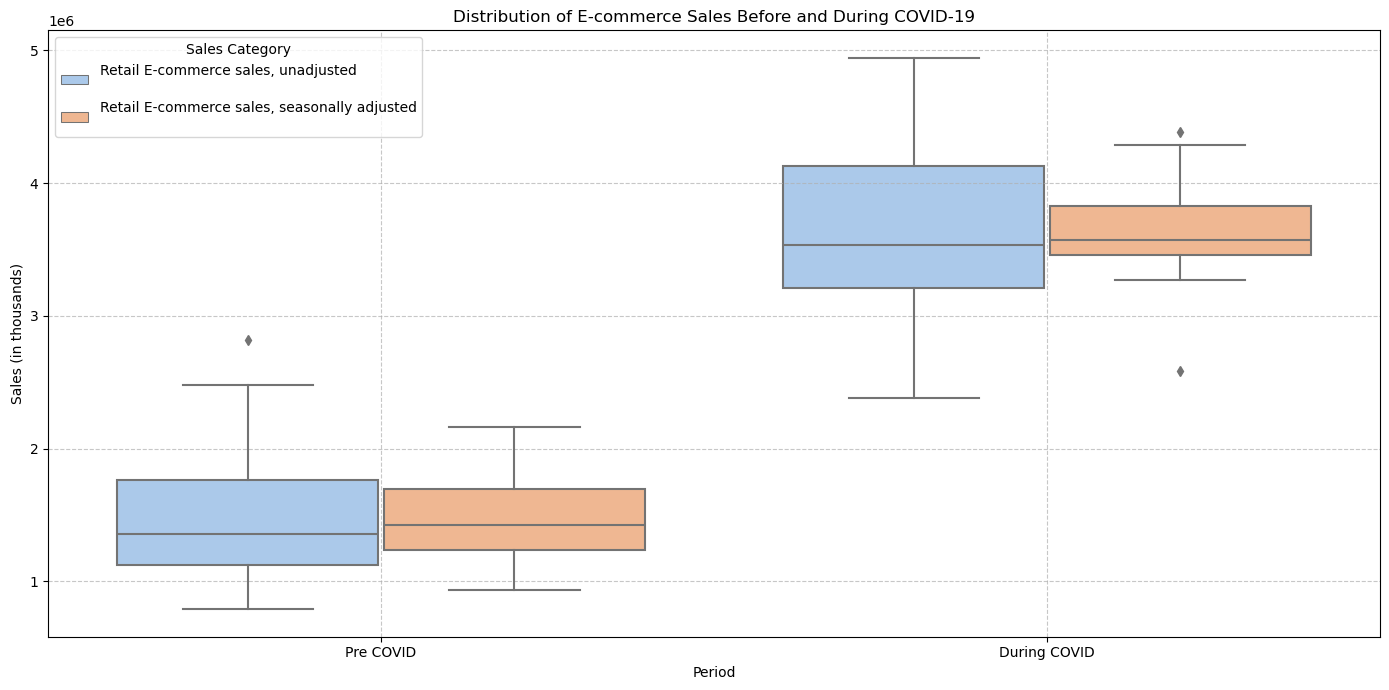

In [49]:
# Calculate the distribution of sales before and during COVID-19
df['Period'] = df['REF_DATE'].apply(lambda x: 'During COVID' if x >= pd.to_datetime('2020-03-01') else 'Pre COVID')

# Filter data for Retail Trade and E-commerce Sales
retail_trade = df[df['Sales'].str.contains('Retail trade, unadjusted')]
ecommerce_sales = df[df['Sales'].str.contains('E-commerce')]

# Plot distribution of sales for Retail Trade
plt.figure(figsize=(14, 7))
sns.boxplot(x='Period', y='VALUE', hue='Sales', data=retail_trade, palette='pastel')
plt.title('Distribution of Retail Trade Sales Before and During COVID-19')
plt.xlabel('Period')
plt.ylabel('Sales (in thousands)')
plt.legend(title='Sales Category')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot distribution of sales for E-commerce Sales
plt.figure(figsize=(14, 7))
sns.boxplot(x='Period', y='VALUE', hue='Sales', data=ecommerce_sales, palette='pastel')
plt.title('Distribution of E-commerce Sales Before and During COVID-19')
plt.xlabel('Period')
plt.ylabel('Sales (in thousands)')
plt.legend(title='Sales Category')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

c:\Users\migo3\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\migo3\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\migo3\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\migo3\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

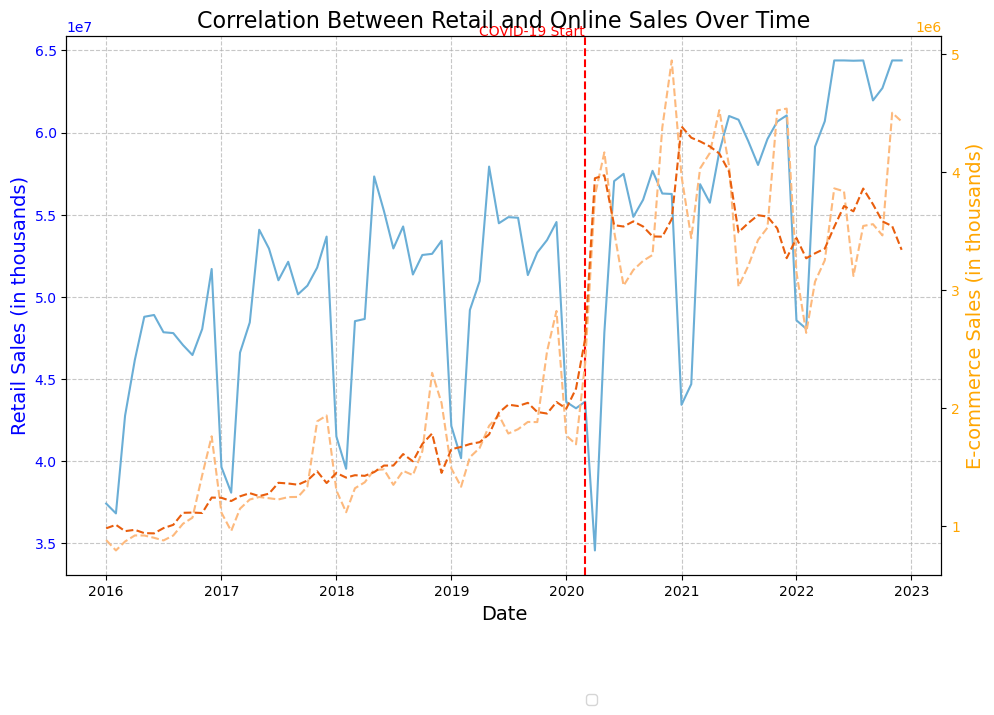

In [52]:
# Calculate cumulative sales for better trend analysis
df['Cumulative_Sales'] = df.groupby('Sales')['VALUE'].cumsum()

# Separate retail and e-commerce data for better visualization
retail_trade = df[df['Sales'].str.contains('Retail trade, unadjusted')]
ecommerce_sales = df[df['Sales'].str.contains('E-commerce')]

# Create a figure with two y-axes
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot retail trade sales on the first y-axis
sns.lineplot(x='REF_DATE', y='VALUE', hue='Sales', data=retail_trade, ax=ax1, palette='Blues', linestyle='-', legend=False)
ax1.set_title('Correlation Between Retail and Online Sales Over Time', fontsize=16)
ax1.set_xlabel('Date', fontsize=14)
ax1.set_ylabel('Retail Sales (in thousands)', fontsize=14, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True, linestyle='--', alpha=0.7)

# Create a second y-axis for e-commerce sales
ax2 = ax1.twinx()
sns.lineplot(x='REF_DATE', y='VALUE', hue='Sales', data=ecommerce_sales, ax=ax2, palette='Oranges', linestyle='--', legend=False)
ax2.set_ylabel('E-commerce Sales (in thousands)', fontsize=14, color='orange')
ax2.tick_params(axis='y', labelcolor='orange')
ax2.grid(False)

# Combine legends
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
combined_legend = handles1 + handles2
combined_labels = labels1 + labels2

# Add vertical line for COVID-19 start
ax1.axvline(pd.to_datetime('2020-03-01'), color='red', linestyle='--')
ax1.text(pd.to_datetime('2020-03-01'), ax1.get_ylim()[1], 'COVID-19 Start', color='red', ha='right')

# Adjust layout to avoid overlap
fig.subplots_adjust(right=0.75)

# Add combined legend
fig.legend(combined_legend, combined_labels, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2)

# Display the plot
plt.show()

In [53]:
# Step 1: Percentage Change in Sales (Pre COVID vs During COVID)
df['Period'] = df['REF_DATE'].apply(lambda x: 'During COVID' if x >= pd.to_datetime('2020-03-01') else 'Pre COVID')
sales_change = df.groupby(['Sales', 'Period'])['VALUE'].sum().unstack().pct_change(axis='columns').iloc[:, 1] * 100
sales_change = sales_change.reset_index().rename(columns={0: 'Percentage Change'})

# Step 2: Cumulative Sales Over Time
df['Cumulative_Sales'] = df.groupby('Sales')['VALUE'].cumsum()
cumulative_sales = df.pivot_table(values='Cumulative_Sales', index='REF_DATE', columns='Sales')

# Step 3: Distribution of Sales Before and During COVID-19
distribution = df.groupby(['Sales', 'Period'])['VALUE'].describe().unstack()

# Step 4: Correlation Between Retail and Online Sales Over Time
correlation_data = df.pivot_table(values='VALUE', index='REF_DATE', columns='Sales')
correlation = correlation_data.corr()

# Display tables
import ace_tools as tools  

tools.display_dataframe_to_user(name="Percentage Change in Sales (Pre COVID vs During COVID)", dataframe=sales_change)
tools.display_dataframe_to_user(name="Cumulative Sales Over Time", dataframe=cumulative_sales)
tools.display_dataframe_to_user(name="Distribution of Sales Before and During COVID-19", dataframe=distribution)
tools.display_dataframe_to_user(name="Correlation Between Retail and Online Sales Over Time", dataframe=correlation)

# Alternatively, use display from IPython for displaying in Jupyter Notebook
from IPython.display import display

print("Percentage Change in Sales (Pre COVID vs During COVID)")
display(sales_change)

print("\nCumulative Sales Over Time")
display(cumulative_sales)

print("\nDistribution of Sales Before and During COVID-19")
display(distribution)

print("\nCorrelation Between Retail and Online Sales Over Time")
display(correlation)


ModuleNotFoundError: No module named 'ace_tools'